# Post process of cross-validation -- CL

## Define task to postprocess

##  task  = ['predict', 'cross_validation']
    - cross_validation is for post process
### 'cross_validation': for cross validation; has 7 folds
### 'predict': for test using parameters chose by cross validation; has 1 fold --> fold8
##  force = ['CL', 'CD']
##  filt  = ['bessel', 'no filter']
    - no filter for all CL, CD


In [1]:
task = 'cross_validation' 
force = 'CL'     
filt = 'bessel' # only for cp; no cl or cd filter

if task == 'cross_validation':
    folds = 7
    print('Post process for ', force)
elif task == 'predict':
    folds = 1
else:
    print('Error. Please define your task.') 
print('Define the task complete.')

Post process for  CL
Define the task complete.


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import bessel
from scipy.signal import filtfilt

#Load the variable
num_neuron = [16, 24, 32, 40, 48, 56, 64, 72]
num_layer  = [1,  2,  3  ,4,  5,  6,  7,  8]
epoch_total = 200


In [6]:
# read data
# folder path
data_path = 'D:/myProject/Exam/Thesis/dashuai/deltaWing/organized_data_from_Frieder/data_force_on_earth_Coordinate_System/' + '2023-01-11-filter-no/gust_dataframe.xlsx'

# read the excel data
gust_origin = pd.read_excel(data_path, engine='openpyxl')

In [7]:
# check data
gust_origin.head()

,case_number,Cp1_t,Cp2_t,Cp3_t,Cp4_t,Cp5_t,Cp6_t,Cp7_t,Cp8_t,Cp9_t,Cp10_t,Cp12_t,Cp13_t,Cp14_t,Cp15_t,Cp16_t,Cp0_t,CL,CD
0,case_01,-1.020413,-0.610013,-0.776402,-0.992375,-0.427389,-0.471947,-0.578770,-0.767883,-1.005905,-0.242947,-0.281585,-0.324500,-0.398877,-0.580220,-1.233073,0.889897,0.533331,0.125085
1,case_01,-1.018687,-0.608741,-0.777038,-0.988559,-0.426753,-0.471221,-0.572956,-0.767793,-1.005815,-0.244037,-0.290489,-0.330588,-0.403783,-0.581219,-1.233618,0.891896,0.520047,0.117766
2,case_01,-1.027681,-0.610286,-0.781126,-0.999098,-0.418213,-0.483122,-0.565142,-0.742717,-1.013083,-0.240766,-0.283311,-0.323319,-0.398604,-0.582037,-1.229530,0.899073,0.527826,0.136049
3,case_01,-1.029044,-0.612739,-0.789030,-0.994555,-0.420121,-0.474855,-0.562689,-0.717641,-1.015808,-0.243038,-0.282130,-0.324046,-0.394698,-0.586307,-1.229802,0.900709,0.546522,0.142592
4,case_01,-1.020867,-0.613284,-0.797571,-0.992466,-0.411490,-0.469676,-0.574954,-0.699834,-1.012538,-0.244128,-0.285128,-0.329406,-0.388156,-0.589487,-1.221171,0.904797,0.518274,0.123129


In [8]:
# set the first column as index, i.e. set case_nn as index, for convenience
gust_origin.set_index('case_number', inplace=True)
print(gust_origin.shape)
# check the first 5 columns
gust_origin.head()

(80000, 18)


,Cp1_t,Cp2_t,Cp3_t,Cp4_t,Cp5_t,Cp6_t,Cp7_t,Cp8_t,Cp9_t,Cp10_t,Cp12_t,Cp13_t,Cp14_t,Cp15_t,Cp16_t,Cp0_t,CL,CD
case_number,,,,,,,,,,,,,,,,,,
case_01,-1.020413,-0.610013,-0.776402,-0.992375,-0.427389,-0.471947,-0.578770,-0.767883,-1.005905,-0.242947,-0.281585,-0.324500,-0.398877,-0.580220,-1.233073,0.889897,0.533331,0.125085
case_01,-1.018687,-0.608741,-0.777038,-0.988559,-0.426753,-0.471221,-0.572956,-0.767793,-1.005815,-0.244037,-0.290489,-0.330588,-0.403783,-0.581219,-1.233618,0.891896,0.520047,0.117766
case_01,-1.027681,-0.610286,-0.781126,-0.999098,-0.418213,-0.483122,-0.565142,-0.742717,-1.013083,-0.240766,-0.283311,-0.323319,-0.398604,-0.582037,-1.229530,0.899073,0.527826,0.136049
case_01,-1.029044,-0.612739,-0.789030,-0.994555,-0.420121,-0.474855,-0.562689,-0.717641,-1.015808,-0.243038,-0.282130,-0.324046,-0.394698,-0.586307,-1.229802,0.900709,0.546522,0.142592
case_01,-1.020867,-0.613284,-0.797571,-0.992466,-0.411490,-0.469676,-0.574954,-0.699834,-1.012538,-0.244128,-0.285128,-0.329406,-0.388156,-0.589487,-1.221171,0.904797,0.518274,0.123129


In [9]:
# bessel filter for every column; only filt CP
if filt == 'bessel':
    
    gust_index   = gust_origin.index
    gust_column  = gust_origin.columns
    gust_no_filter = np.zeros((gust_index.nunique(),len(gust_origin.loc[['case_01']]),len(gust_origin.columns))) # (32,2500,18)
    gust_filter    = np.zeros((gust_index.nunique(),len(gust_origin.loc[['case_01']]),len(gust_origin.columns)))
    case_all_no = (np.linspace(0,31,32)).astype(int)
    b, a = bessel(8, 0.01) # define the bessel filter; 8 is the filter order; 0.01 is the W_n (between 0 to 1)
    
    for i in case_all_no:      # i is the case number
        case_numer = 'case_' + str(i+1).zfill(2)
        gust_no_filter[i] = gust_origin.loc[[case_numer]].to_numpy()
        for j in range(len(gust_origin.columns)-2):       # j is the CP and CL CD number
            gust_filter[i][:,j] = filtfilt(b, a, gust_no_filter[i][:,j]) # bessel filter for cp
        gust_filter[i][:,len(gust_origin.columns)-2] = gust_no_filter[i][:,len(gust_origin.columns)-2]  # no filter for CL
        gust_filter[i][:,len(gust_origin.columns)-1] = gust_no_filter[i][:,len(gust_origin.columns)-1]  # no filter for CD
    gust = pd.DataFrame(data=np.concatenate(gust_filter,axis=0), index=gust_index, columns=gust_column)
    
elif filt == 'no filter':
    gust = gust_origin
    
else:
    print('Error. Please define your filter.')

In [13]:
# check gust
gust.head()

,Cp1_t,Cp2_t,Cp3_t,Cp4_t,Cp5_t,Cp6_t,Cp7_t,Cp8_t,Cp9_t,Cp10_t,Cp12_t,Cp13_t,Cp14_t,Cp15_t,Cp16_t,Cp0_t,CL,CD
case_number,,,,,,,,,,,,,,,,,,
case_01,-0.989251,-0.586589,-0.749452,-0.958598,-0.410507,-0.453256,-0.557566,-0.739864,-0.991654,-0.240513,-0.273198,-0.319951,-0.390352,-0.577261,-1.208769,0.910732,0.533331,0.125085
case_01,-0.988749,-0.586124,-0.749185,-0.958168,-0.410153,-0.452932,-0.557203,-0.739344,-0.991436,-0.240332,-0.273074,-0.319834,-0.390250,-0.576948,-1.208118,0.911979,0.520047,0.117766
case_01,-0.988245,-0.585658,-0.748917,-0.957735,-0.409799,-0.452607,-0.556838,-0.738825,-0.991217,-0.240149,-0.272949,-0.319716,-0.390147,-0.576633,-1.207466,0.913226,0.527826,0.136049
case_01,-0.987740,-0.585190,-0.748647,-0.957301,-0.409444,-0.452283,-0.556473,-0.738306,-0.990998,-0.239966,-0.272824,-0.319598,-0.390045,-0.576318,-1.206813,0.914474,0.546522,0.142592
case_01,-0.987234,-0.584721,-0.748377,-0.956865,-0.409090,-0.451958,-0.556105,-0.737788,-0.990778,-0.239781,-0.272698,-0.319480,-0.389941,-0.576002,-1.206159,0.915721,0.518274,0.123129


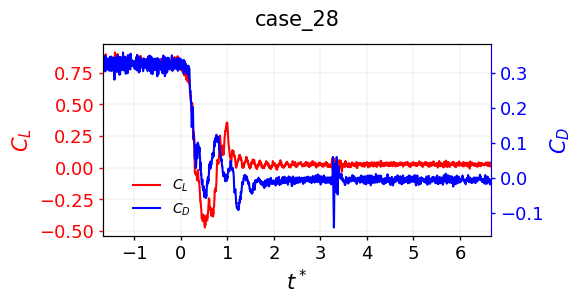

In [15]:
# plot CL and CD together
T = 0.3 # period is 0.3s
f = 1000 # frequency is 1000Hz
t_star = (np.arange(0,10000)-500) / f / T 

case_to_show_force = 28
gust_to_show_force = gust.loc['case_' + str(case_to_show_force).zfill(2)]
fig,ax1 = plt.subplots(figsize=(5,2.5))
ax1.plot(t_star[0:2500], gust_to_show_force[['CL']].to_numpy(),color='red',label='$C_L$')
ax1.tick_params(axis='x',labelsize=13)
ax1.tick_params(axis='y', colors='red',labelsize=13)
ax1.spines['right'].set_color('red')
ax1.set_xticks(np.arange(-1,6.7,1))
# ax1.set_xticklabels(np.arange(-1.5,6.6,0.5), rotation=45)
# ax1.set_xlim(0,8)
ax1.margins(x=0)
ax1.grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
ax1.set_xlabel('$t^*$',fontsize=15)
ax1.set_ylabel('$C_L$',fontsize=15, color='red')
ax1.set_yticks([-0.5,-0.25,0,0.25,0.5,0.75])

ax2 = ax1.twinx()
ax2.plot(t_star[0:2500],gust_to_show_force[['CD']].to_numpy(),color='blue',label='$C_D$')
ax2.tick_params(axis='y', colors='blue',labelsize=13)
ax2.spines['right'].set_color('blue')
ax2.set_yticks([-0.1,0,0.1,0.2,0.3])
ax2.set_ylabel('$C_D$',fontsize=15, color='blue')
ax2.tick_params(axis='y', direction='out', length=3, width=1, colors='blue',
               grid_color='gray', grid_alpha=0.5)
ax2.margins(x=0)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center', bbox_to_anchor=(0.15, 0.2), ncol=1, frameon=False)
ax1.set_title('case_%d' % (case_to_show_force),fontsize=15, y=1.05)
ax1.tick_params(axis='x', direction='out', length=3, width=1, colors='black',
               grid_color='k', grid_alpha=0.5)
ax1.tick_params(axis='y', direction='out', length=3, width=1, colors='red',
               grid_color='k', grid_alpha=0.5)

# fig.savefig('CL_CD_case%d.svg' % (case_to_show_force), bbox_inches='tight')

In [16]:
# retrieve CL or CD
if force == 'CL':
    CL = gust[['CL']]
elif force == 'CD':
    CD = gust[['CD']]
else:
    print('Error. Please define your force to post process.')
gust[['CL']].head()

,CL
case_number,
case_01,0.533331
case_01,0.520047
case_01,0.527826
case_01,0.546522
case_01,0.518274


In [17]:
# retrieve for 8 different folds
# read the split .txt file; the number means the cases for test
split_path = 'D:/myProject/Exam/Thesis/dashuai/deltaWing/organized_data_from_Frieder/data_force_on_earth_Coordinate_System/' + 'delta_wing_32cases_split_random.txt'
with open(split_path, 'r') as file1:    
    fold_split = file1.read().splitlines()       # split by \n
fold_split = fold_split[1:] # drop the head line
for i in range(8):
    fold_split[i] = fold_split[i][9:].split()    # split by space; the number starts from 10th character.
    for j in range(4):
        fold_split[i][j] = int(fold_split[i][j]) # convert string to int
fold_split

[[4, 19, 26, 30],
 [5, 14, 31, 32],
 [1, 18, 22, 29],
 [6, 10, 16, 17],
 [2, 8, 11, 24],
 [3, 7, 15, 27],
 [9, 12, 21, 23],
 [13, 20, 25, 28]]

In [18]:
# define the 32 case number
case_all_num = np.arange(gust.index.nunique()) + 1
print(case_all_num)
print(case_all_num.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
(32,)


In [19]:
# find the case number for test cases;
if task == 'cross_validation':
    test_case  = [ [0]*4 for _ in range(folds) ]
    # find case number for cross validation folds: fold1~fold7
    for i in range(folds): 
        # drop test case and the last one (which is for fold 8 , final test)
        test_case_temp  = fold_split[i]

        # conbine to 'case_nn' sample for train and test case; prepare for next step
        for k in range(len(test_case_temp)):
            test_case[i][k]  = 'case_' + str(test_case_temp[k]).zfill(2)
            
else:
    print('Error. Please define your task.')

print('Done!')

Done!


In [20]:
print(test_case[0])

['case_04', 'case_19', 'case_26', 'case_30']


In [21]:
#  prepare for test data sets
if task == 'cross_validation':
    F_test_rec  = np.zeros([folds,10000,1])  # 4*2500  = 10000

    for i in range(folds): # 7 folds for training, the last one is for test, not retrieve here, since this is for training
        if force == 'CL':
            F_test_rec[i]  = CL.loc[test_case[i]].to_numpy()
        elif force == 'CD':
            F_test_rec[i]  = CD.loc[test_case[i]].to_numpy()
        else:
            print('Error. Please define force.')
    
else:
    print('Error. Please define your task.')
    
print('Post process for ', force)

Post process for  CL


Processing layer: 1
Processing layer: 2
Processing layer: 3
Processing layer: 4
Processing layer: 5
Processing layer: 6
Processing layer: 7
Processing layer: 8


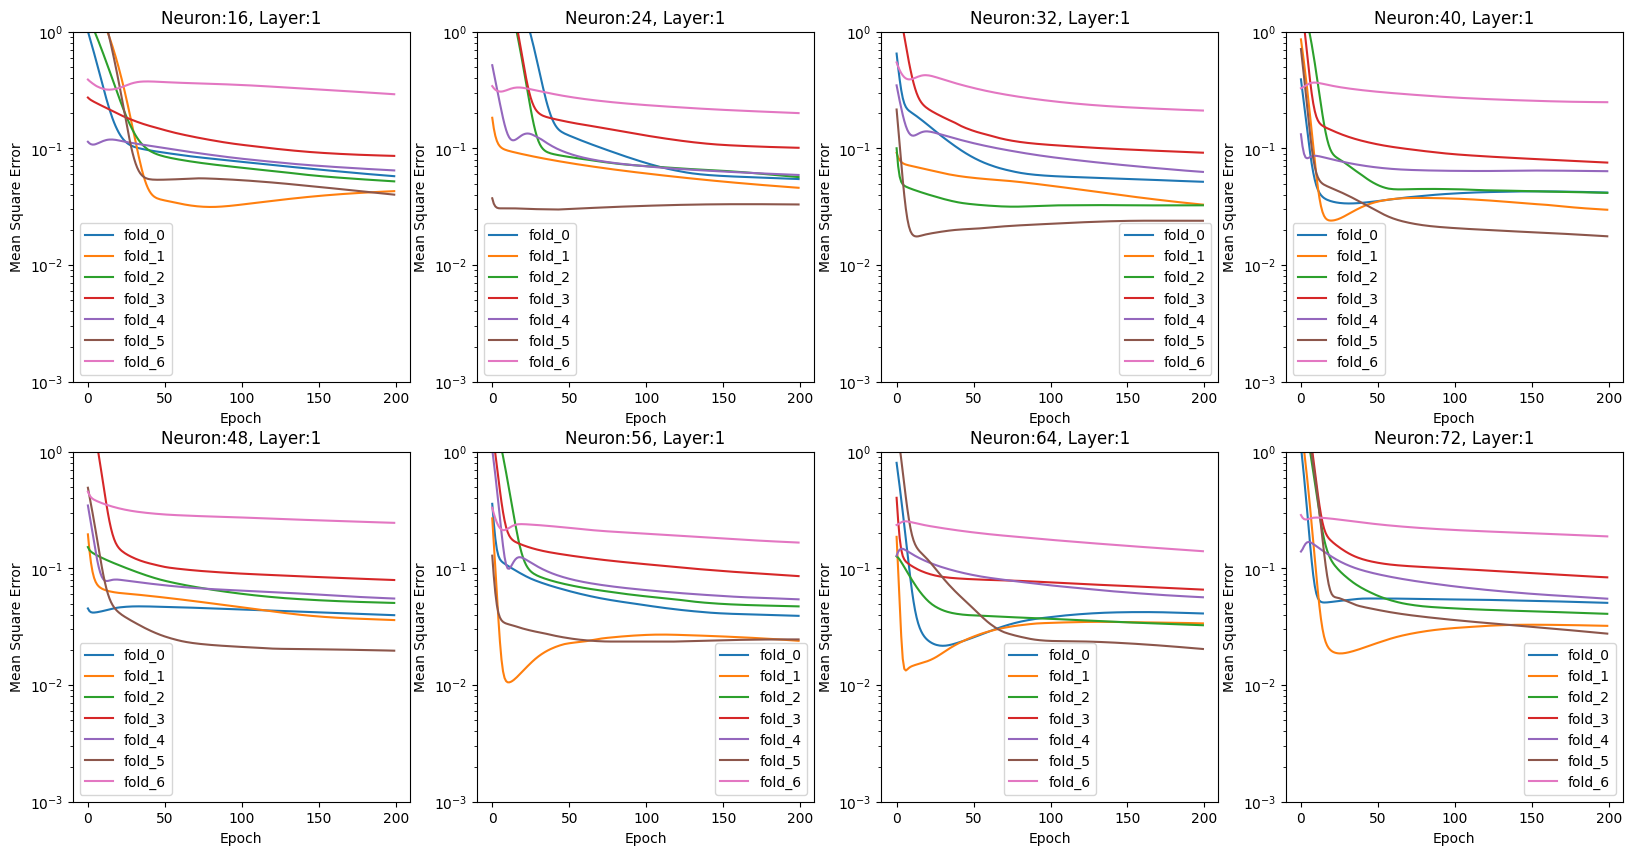

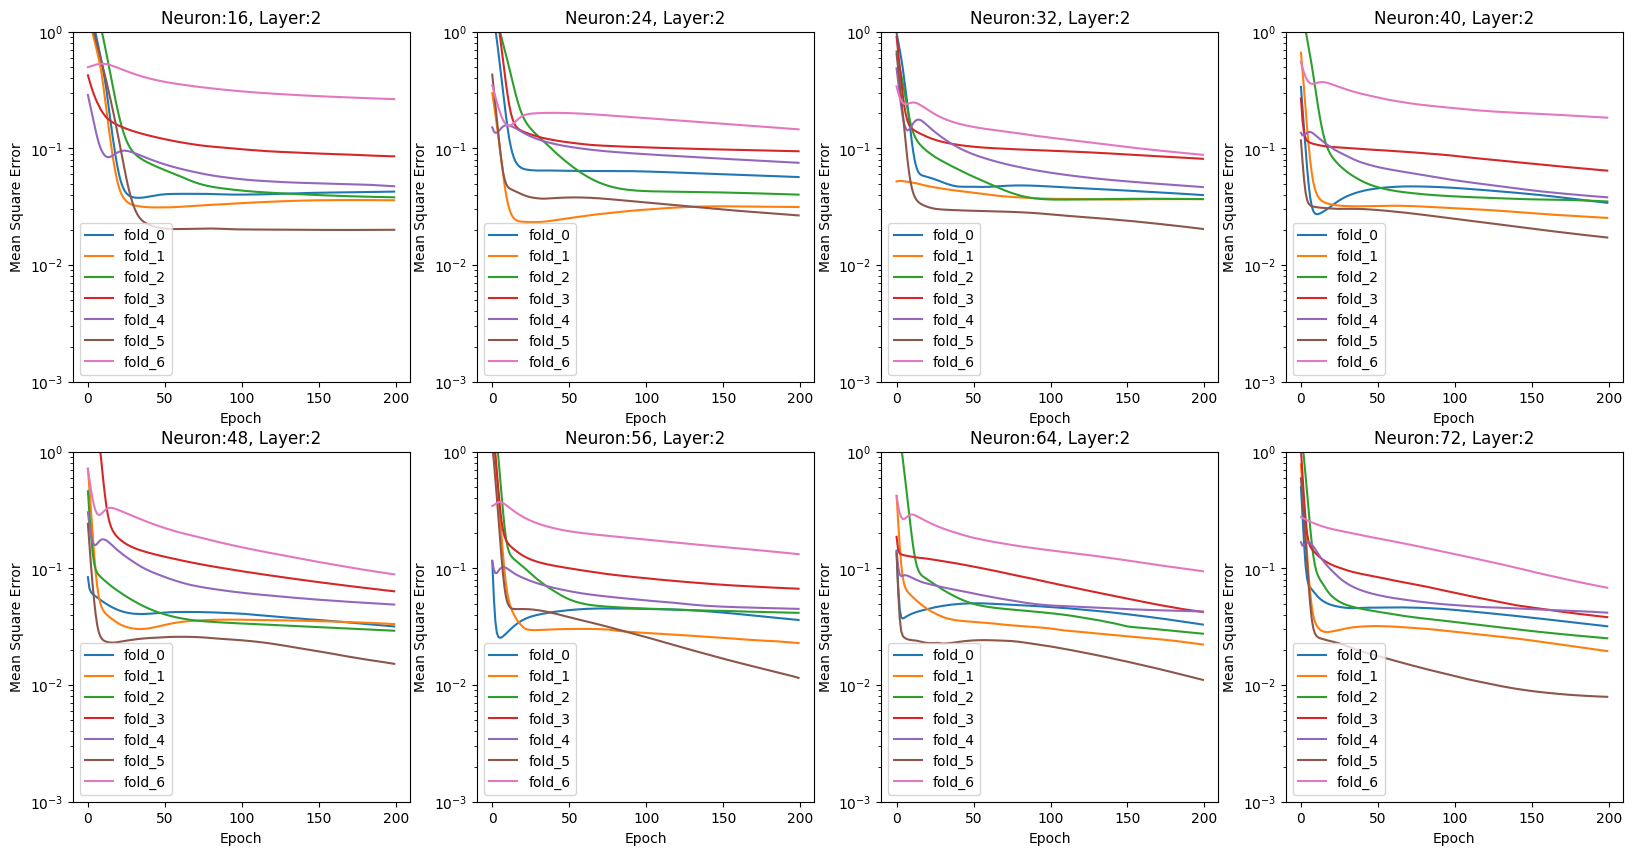

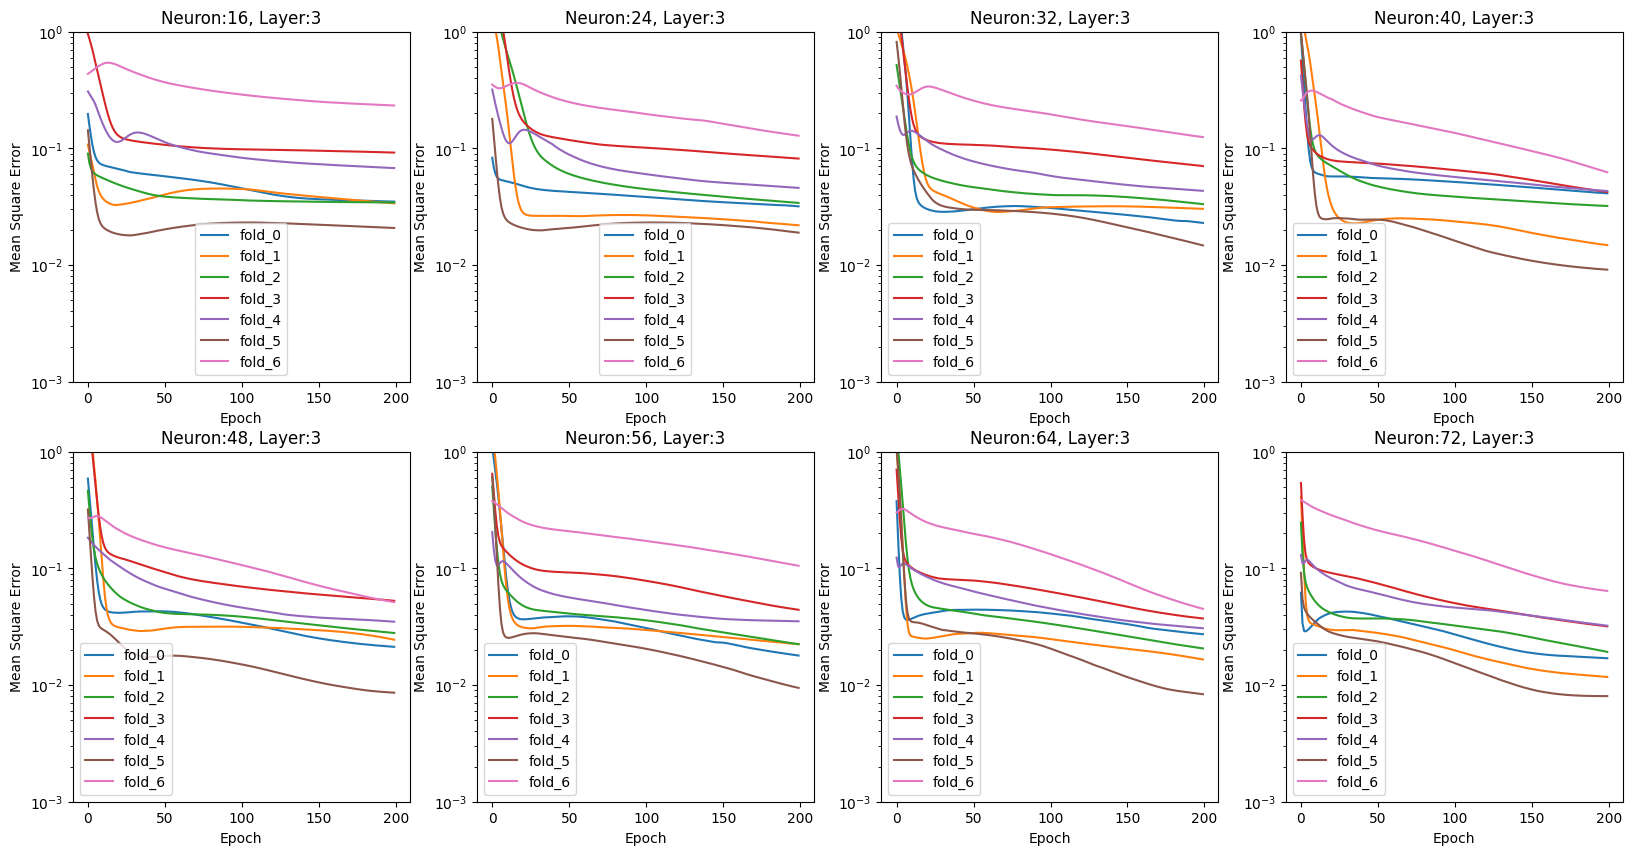

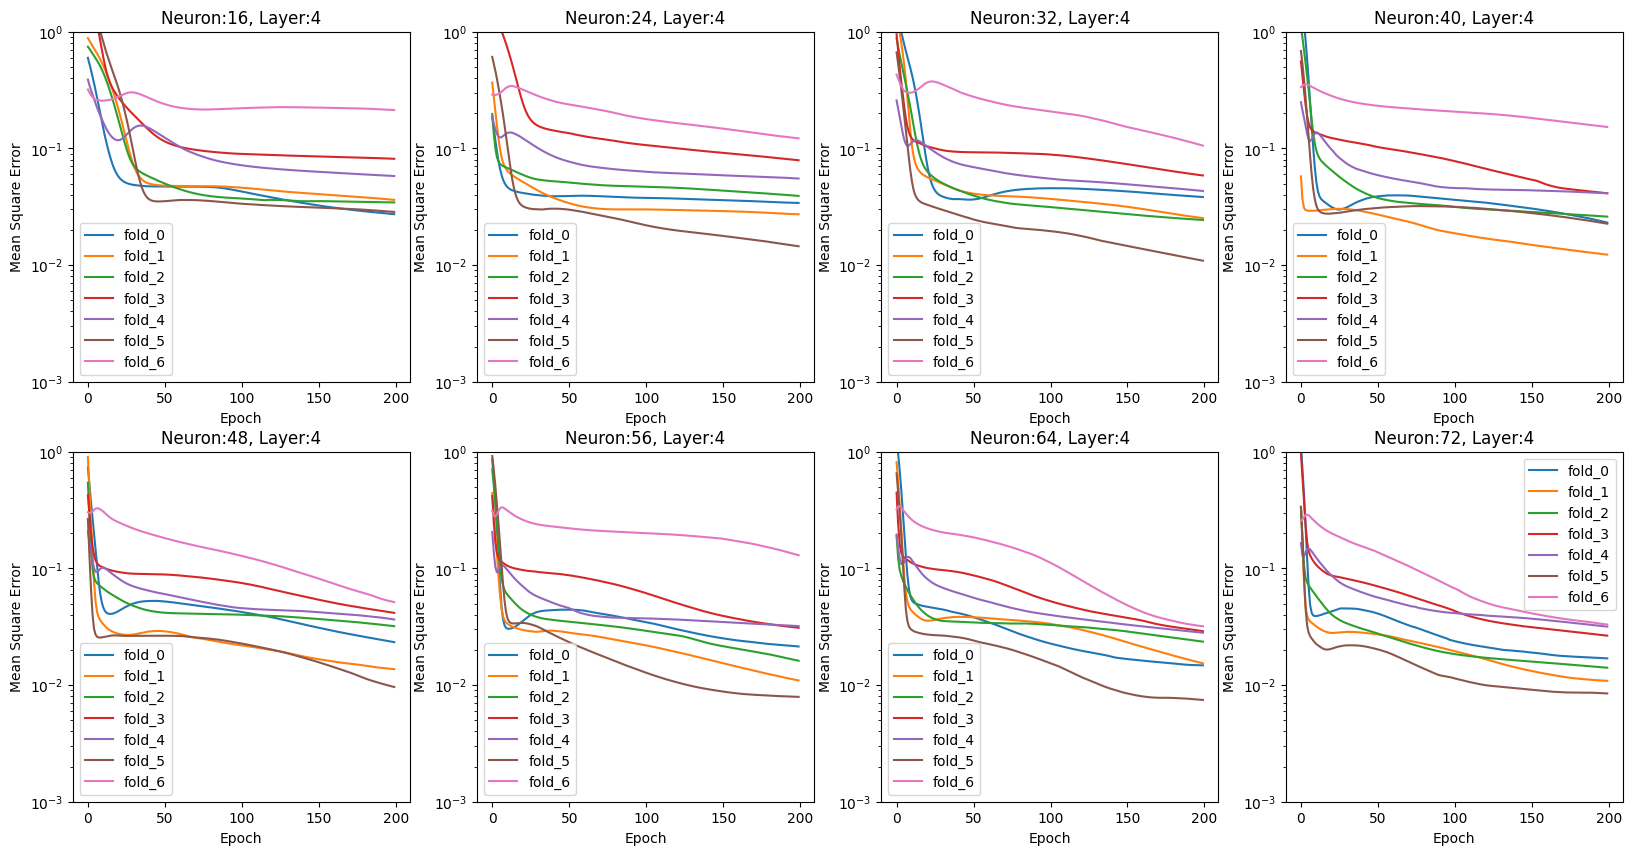

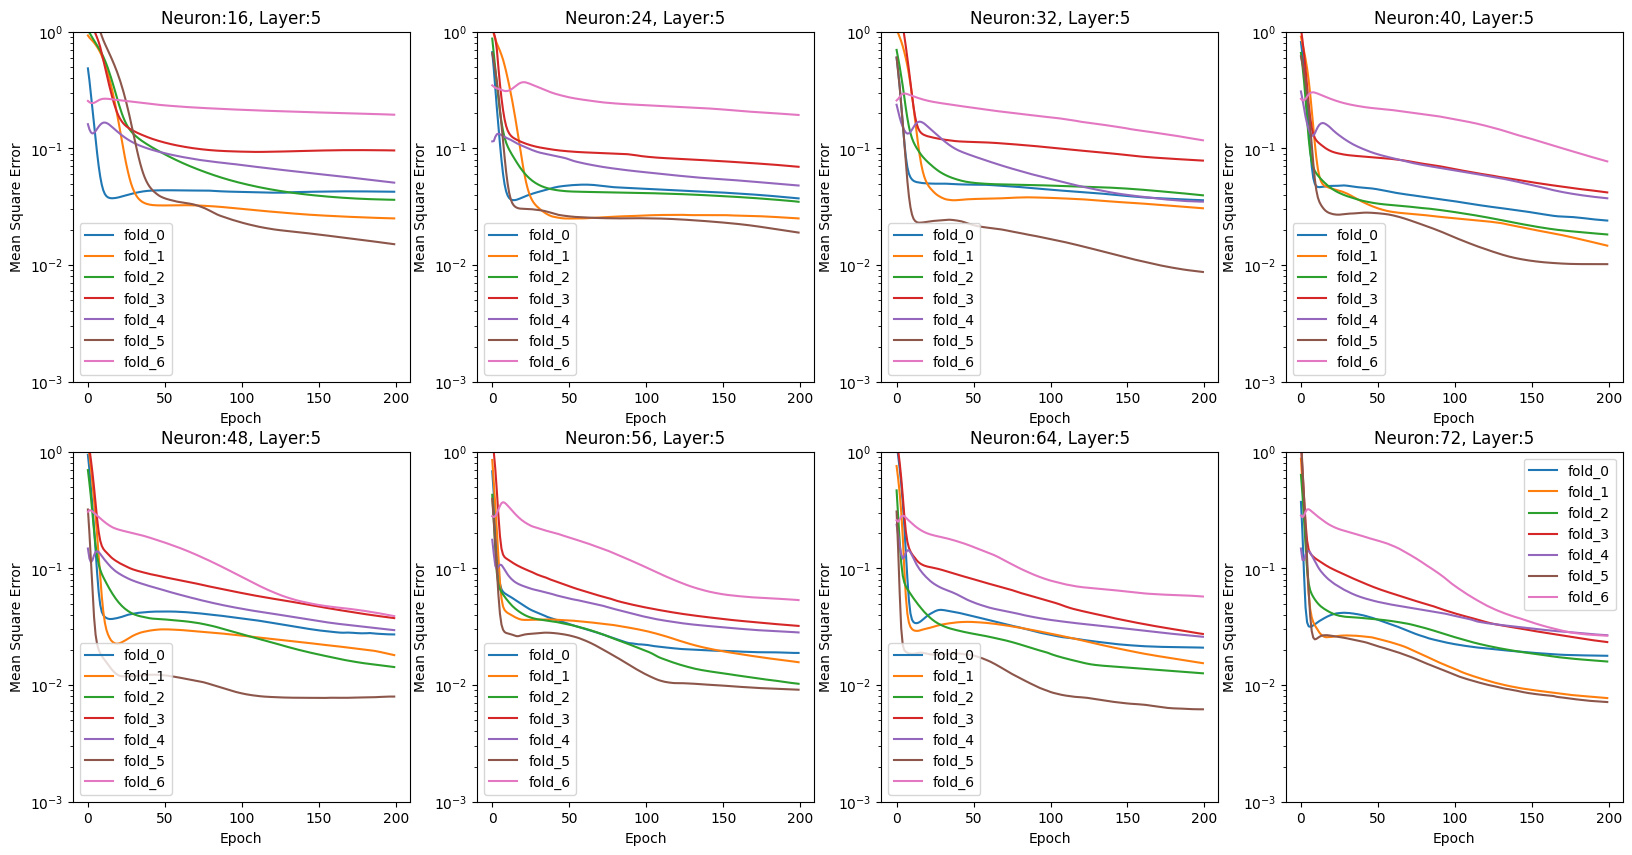

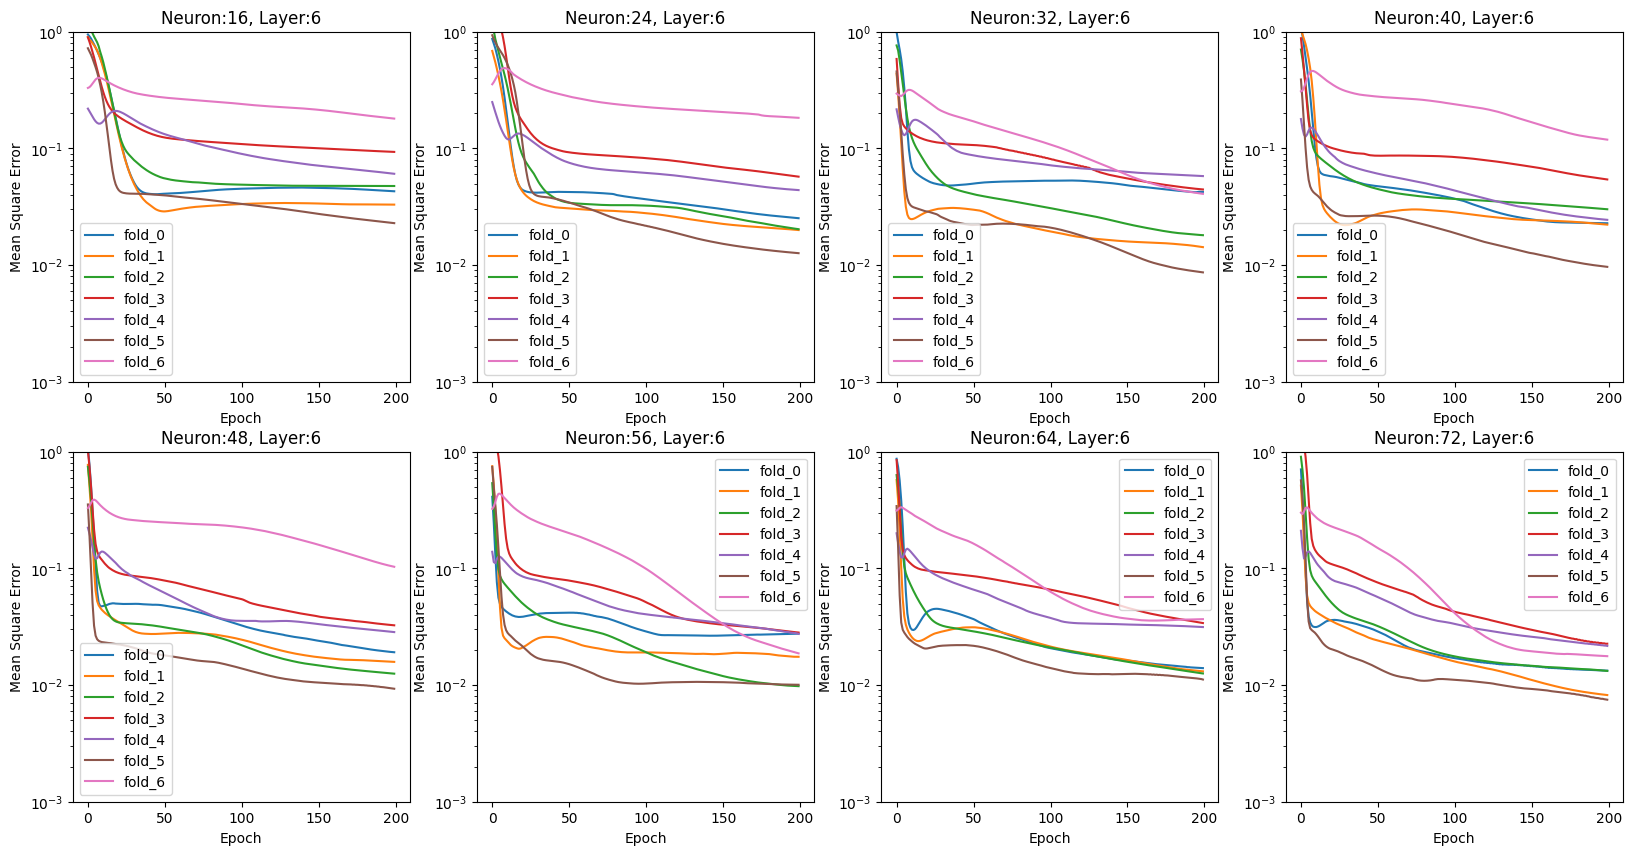

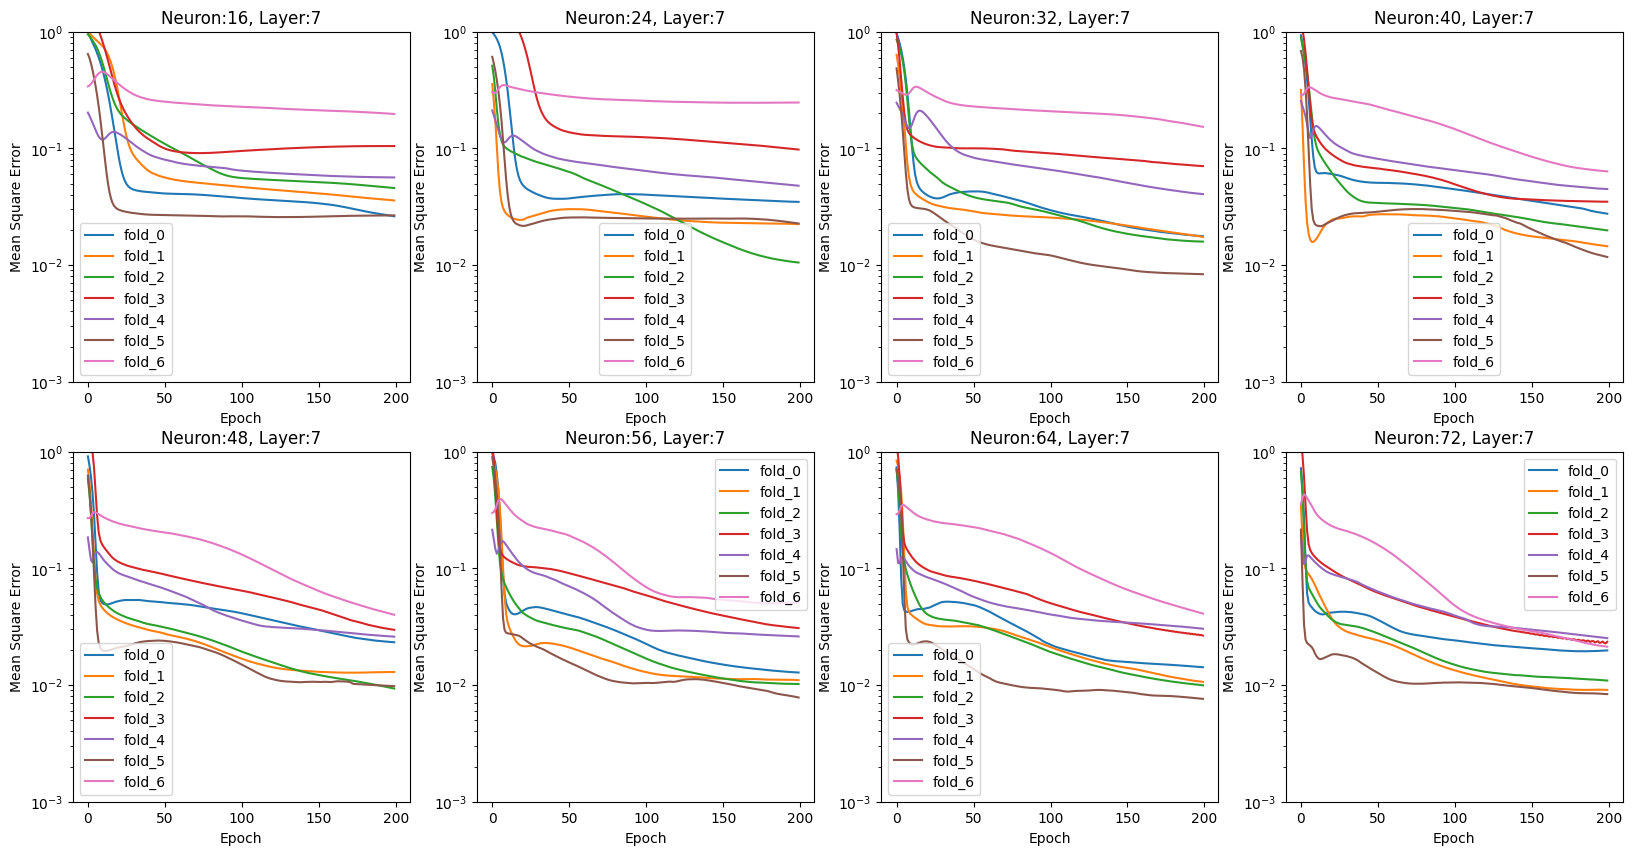

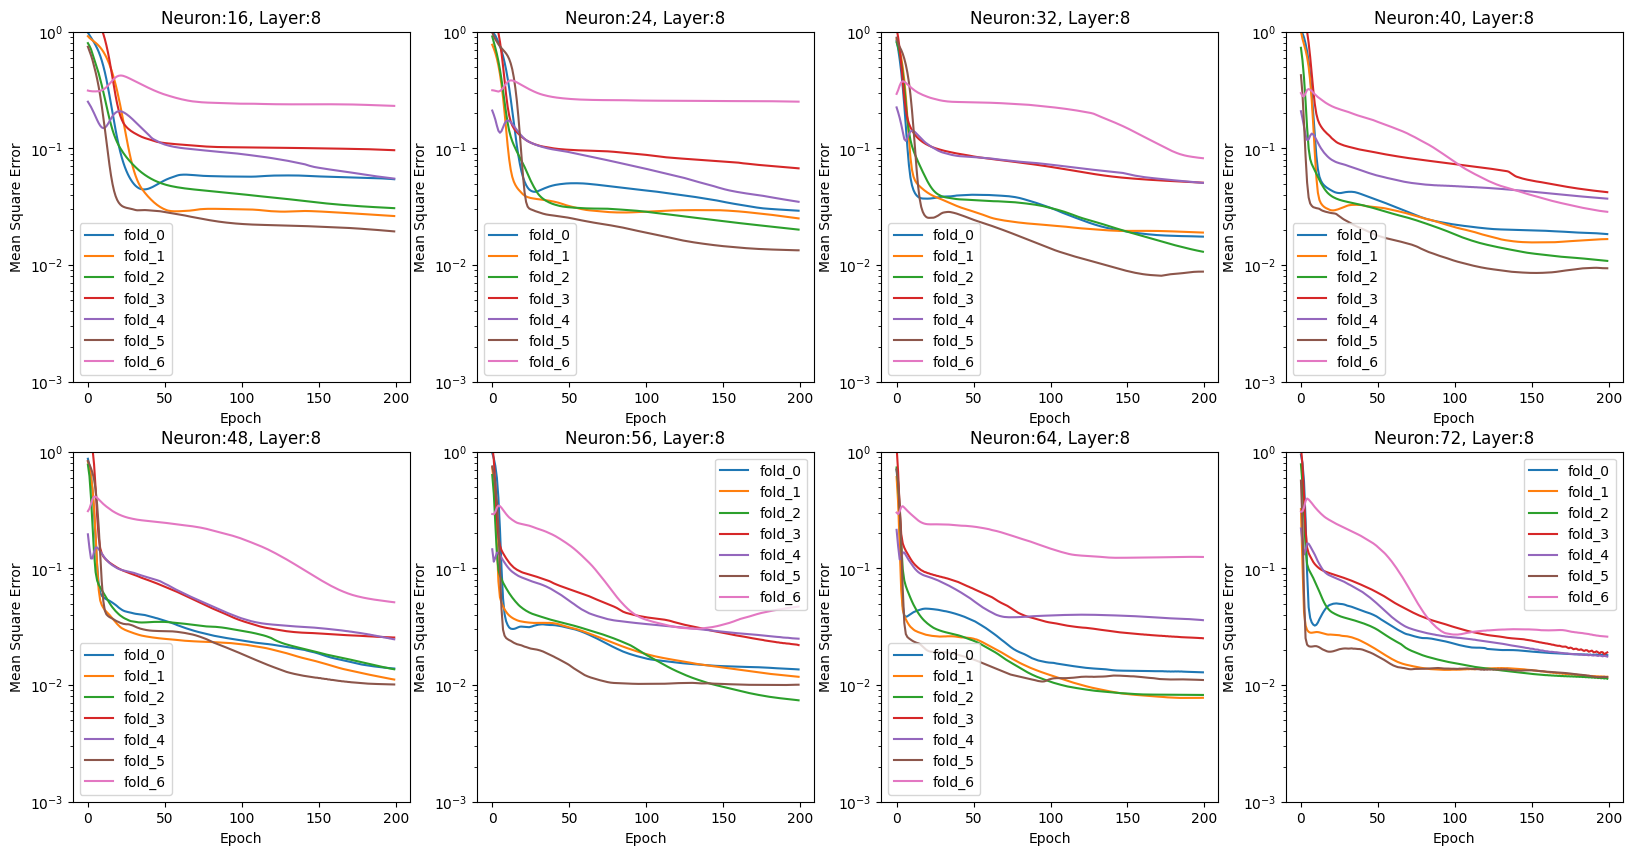

In [35]:
'''calculate the MSE for every epoch'''
from sklearn.metrics import mean_squared_error as mse
epoch_used         = 200 # 50 or 200 epoch_total # 200 epochs
mse_pred_per_epoch = np.zeros([8,7,epoch_used])
allFolds_mean      = np.zeros([8,len(num_neuron), epoch_used])
allFolds_mean_min  = np.zeros([8,len(num_neuron)])
mse_pred_per_epoch_min = np.zeros([8,8,7])

mse_first_mean = np.zeros([len(num_layer),8])
min_value_index = np.zeros([len(num_layer),1]).astype(int)

result_folder = 'D:/myProject/Exam/Thesis/dashuai/deltaWing/code/2023-01-13-cv-cl-lr-10-5/cv-data/'

for layers in num_layer: # [1,2,3,4,5,6,7,8]
    fig1, ax1 = plt.subplots(2, 4, figsize=(20, 10)) # define figure
    fig_num = 0 # for count only
    print('Processing layer: %d' % (layers))
    for n in num_neuron: #[16,24,32,40,48,56,64,72]
        for i in range(folds): # number of folds
            predictions = np.array(pickle.load(open(result_folder+'F_pred_fold_'+str(i)+'_neuron_'+str(n)+'_layer_'+str(layers)+'.dat', 'rb')))
            for j in range(epoch_used):
                mse_pred_per_epoch[int(n/8-2)][i,j] = mse(F_test_rec[i][:,:], predictions[j][:,:])
            if fig_num in [0,1,2,3]:
                p = 0
                q = fig_num
            else:
                p = 1
                q = fig_num - 4
            ax1[p,q].semilogy(mse_pred_per_epoch[int(n/8-2)][i,:],label='fold_'+str(i))
            mse_pred_per_epoch_min[layers-1][int(n/8-2),i] = mse_pred_per_epoch[int(n/8-2)][i,:].min()
            ax1[p,q].legend()
        ax1[p,q].set_ylim([0.001,1])
        ax1[p,q].set_xlabel('Epoch')
        ax1[p,q].set_ylabel('Mean Square Error')
        ax1[p,q].set_title('Neuron:%d, Layer:%d' % (n, layers))
        allFolds_mean[layers-1][int(n/8-2),:] = mse_pred_per_epoch[int(n/8-2)].mean(axis=0)
        allFolds_mean_min[layers-1][int(n/8-2)] = min(allFolds_mean[layers-1][int(n/8-2)])

        fig_num = fig_num + 1
        # print(fig_num)
        # fig1.savefig('mse_layer'+str(layers)+'.svg', format='svg', bbox_inches='tight')

# average the 7 folds, then find the min; that's what I need

In [34]:
import pandas as pd
allFolds_mean_min # row: layer; column: neuron
bbb = pd.DataFrame(data=allFolds_mean_min)
# bbb.to_csv('mean_error_50.csv') # save for 50 epochs. you need to modify the epoch_used in the above code. Remember!!!
bbb.to_csv('mean_error.csv') # save for 200 epochs. you need to modify the epoch_used in the above code. Remember!!!

In [ ]:
# no use !!!
# this function is to find the point that shoud stop early of validaiton curve; by gradient
# it returns the epoch and the corresponding mse
def stop_early(error_hist, threshold=2.13281109e-06):
    error = 10 # nothing, just pick a large number to initialize
    i     = 0
    while error >= threshold:
        error = (error_hist[i] - error_hist[i+1])**2
        i     = i + 1
    return(i, error_hist[i])

Processing layer: 1
Processing layer: 2
Processing layer: 3
Processing layer: 4
Processing layer: 5
Processing layer: 6
Processing layer: 7
Processing layer: 8


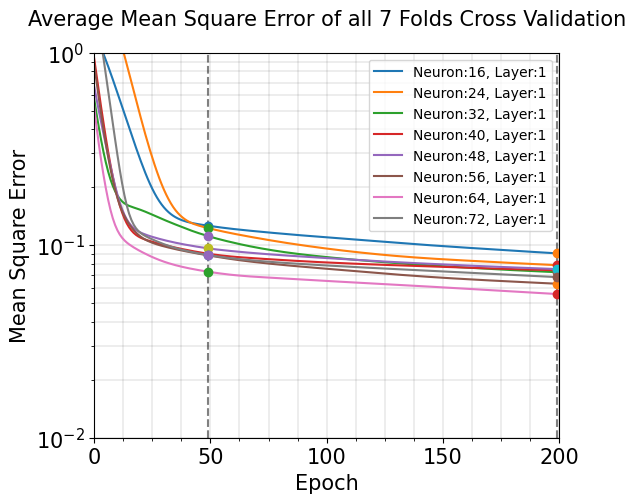

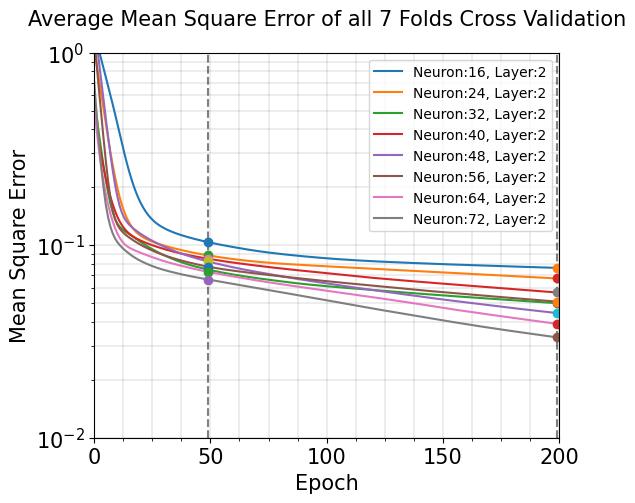

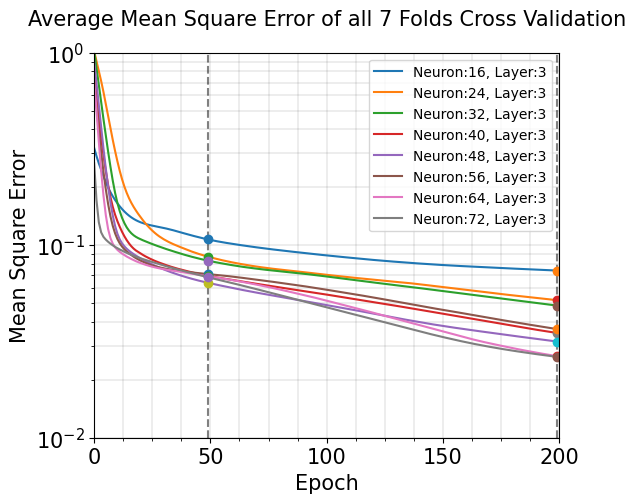

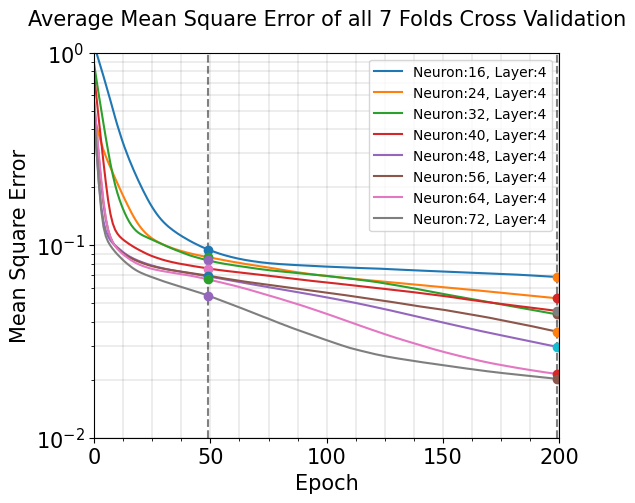

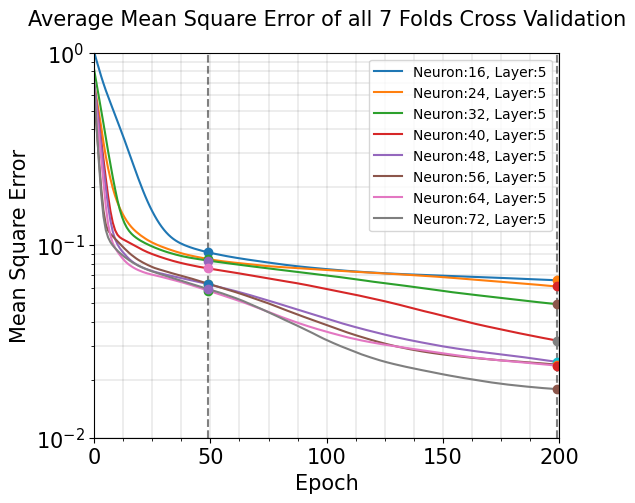

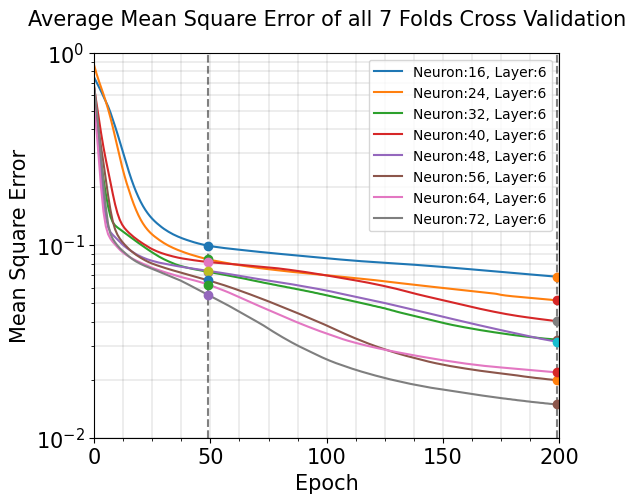

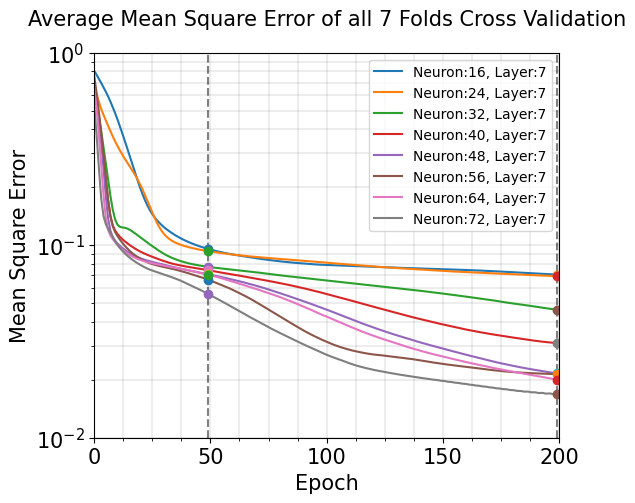

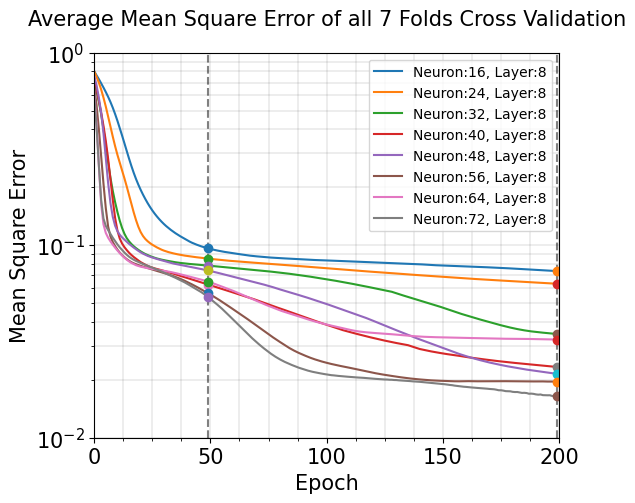

In [24]:
epoch_stop = np.zeros((8,8))
mse_stop = np.zeros((8,8))
# plot a line to indicate 50 and 200 epochs
x_coord_50  = 50-1
x_coord_200 = 200-1
color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']
for layers in num_layer:
    fig2, ax2 = plt.subplots(figsize=(6,5))
    ax2.set_ylim([0.01, 1])
    ax2.set_xlim([0, 200])
    print('Processing layer: %d' % (layers))
    for i in range(len(num_neuron)):
        ax2.semilogy(allFolds_mean[layers-1][i,:], label=('Neuron:%d, Layer:%d' % (num_neuron[i],layers)), color=color[i], zorder=2)
        # epoch_stop[layers-1][i],mse_stop[layers-1][i]) = stop_early(allFolds_mean[layers-1][i,:]
        # ax2.plot(epoch_stop[layers-1][i], mse_stop[layers-1][i], 'o') # find early stops by gradient
        ax2.plot(50-1,allFolds_mean[layers-1][i,50-1], 'o') # find early stops by epochs=50, 200
        ax2.plot(200-1,allFolds_mean[layers-1][i,200-1], 'o') # find early stops by epochs=50, 200
    ax2.legend()
    ax2.set_xlabel('Epoch',fontsize=15)
    ax2.set_ylabel('Mean Square Error',fontsize=15)
    
    # set title for different task
    if task == 'cross_validation':
        ax2.set_title('Average Mean Square Error of all 7 Folds Cross Validation', fontsize=15, y=1.05)
    elif task == 'predict':
        ax2.set_title('Layer:%d'%(layers)+' | Average of all CV | Min error:%f | best neuron:%d' % (min(allFolds_mean_min[layers-1]), 
                                                               num_neuron[np.where(allFolds_mean_min[layers-1] == 
                                                                                   allFolds_mean_min[layers-1].min())[0][0]]))
    else:
        print('Error. Please define your task.') 

    ax2.axvline(x=x_coord_50, color='gray', linestyle='--', zorder=1)
    ax2.axvline(x=x_coord_200, color='gray', linestyle='--', zorder=1)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    ax2.set_xticks(ticks = np.arange(0,201,50))
    ax2.margins(x=0)
    ax2.grid(which='both', axis='both', color='k', linestyle='-', linewidth=0.1)
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(12.5))
    
    # fig2.savefig('layer_%d_allFolds_mean_' % (layers) + force + '.svg' , bbox_inches='tight')

In [ ]:
from matplotlib.ticker import MaxNLocator
mse_first_mean
colors  = ['c', 'r', 'g', 'peru', 'm', 'sienna']
markers = ['s', 'v', 'o', '<', 'd', 'p']
x_neurons = np.array([16,24,32,40,48,56,64,72])

fig, ax = plt.subplots(1,1)
for i in range(6):
    ax.semilogy(x_neurons, mse_first_mean[i][:], color=colors[i], marker=markers[i])
    ax.semilogy(x_neurons, mse_first_mean[i],label='layer_%d' % (i+1), color=colors[i], marker=markers[i], ms=5, mfc='w')
    ax.legend(ncol=2, loc="best", bbox_to_anchor=(0.0, 0, 0.5, 0.5))
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks(x_neurons)
ax.set_xlabel('Neuron')
ax.set_ylabel('Mean Square Error (log)')
ax.set_title('Averaged MSE at the 1st min point of 7-fold cross-validation')

In [26]:
task

'cross_validation'

In [38]:
import pandas as pd
# read 50 epochs MSE
mean_error_file_50 = 'mean_error_50' + '.csv'            # average the 7 folds, then find the min; that's what I need
mean_error_50 = pd.read_csv(mean_error_file_50, skiprows=0).to_numpy()   # transform data to numpy array

# read 200 epochs MSE
mean_error_file = 'mean_error' + '.csv'            # average the 7 folds, then find the min; that's what I need
mean_error = pd.read_csv(mean_error_file, skiprows=0).to_numpy()   # transform data to numpy array

# plot the contour

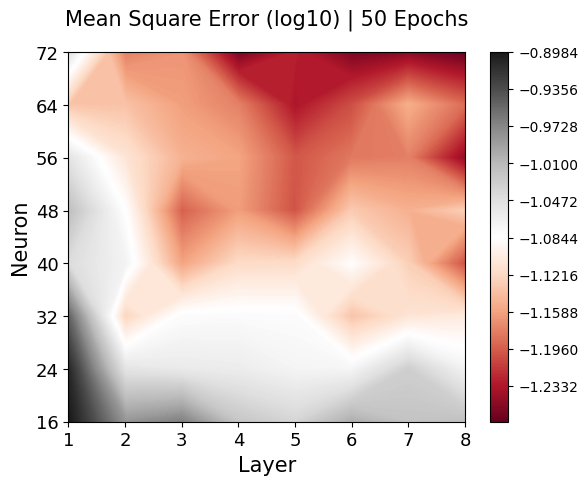

In [44]:
# MSE map at end stops: epoch -- 50
import math
layer_list = np.linspace(1, 8, 8)
neuron_list = np.linspace(16, 72, 8)
X, Y = np.meshgrid(layer_list, neuron_list)
mse_average_allFolds = np.zeros([8,8])

fig4,ax4=plt.subplots()
clev = np.arange(np.log10(mean_error_50[:,1:].min()), np.log10(mean_error_50[:,1:].max()),0.01)
cp = ax4.contourf(X, Y, np.log10(np.transpose(mean_error_50[:,1:]).astype(float)), 1000, cmap='RdGy')

# hide the contour linestrokes when saving as svg
for a in cp.collections:
    a.set_edgecolor("face")
    
fig4.colorbar(cp) # Add a colorbar to a plot
ax4.set_title('Mean Square Error (log10) | 50 Epochs' ,fontsize=15, y=1.05)
ax4.set_yticks(np.linspace(16, 72, 8))
ax4.set_xlabel('Layer',fontsize=15)
ax4.set_ylabel('Neuron',fontsize=15)
ax4.tick_params(axis='both', which='major', labelsize=13)

plt.show()
fig4.savefig('mse_2d_contour_CL_50epochs.svg', bbox_inches='tight')

In [ ]:
# no use!!! no use!!! no use!!!    this code is for gradient stop, but i use 50 and 200 stop, instead

# find the index of epoch_stop for different layers
epoch_stop_all = np.zeros((8))
for i in range(8):
    epoch_stop_all[i] = epoch_stop[i][np.where(mse_stop[i] == mse_stop[i].min())]
fig, ax = plt.subplots()
ax.plot(np.arange(8)+1, epoch_stop_all, color='r', marker='*')
ax.set_xlabel('Layer')
ax.set_ylabel('Stop Epoch')

# no use!!! no use!!! no use!!!

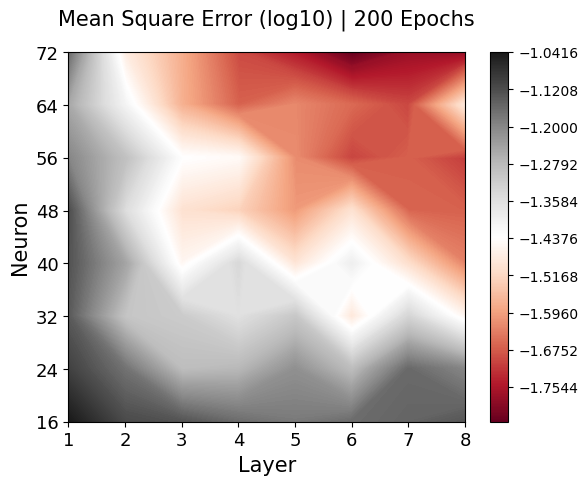

In [43]:
# MSE map at end stops: epoch -- 200
import math
layer_list = np.linspace(1, 8, 8)
neuron_list = np.linspace(16, 72, 8)
X, Y = np.meshgrid(layer_list, neuron_list)
mse_average_allFolds = np.zeros([8,8])

fig4,ax4=plt.subplots()
clev = np.arange(np.log10(mean_error[:,1:].min()), np.log10(mean_error[:,1:].max()),0.01)
cp = ax4.contourf(X, Y, np.log10(np.transpose(mean_error[:,1:]).astype(float)), 1000, cmap='RdGy')

# hide the contour linestrokes when saving as svg
for a in cp.collections:
    a.set_edgecolor("face")
    
fig4.colorbar(cp) # Add a colorbar to a plot
ax4.set_title('Mean Square Error (log10) | 200 Epochs' ,fontsize=15, y=1.05)
ax4.set_yticks(np.linspace(16, 72, 8))
ax4.set_xlabel('Layer',fontsize=15)
ax4.set_ylabel('Neuron',fontsize=15)
ax4.tick_params(axis='both', which='major', labelsize=13)

plt.show()
# fig4.savefig('mse_2d_contour_CL_200epochs.svg', bbox_inches='tight')